# ME 581 HW 3 Solution [Python 3]
Yi Yang @ (yang1087@purdue.edu), all rights reserved.

## Problem 1
Use the Gauss-Seidel method to solve the following system of equations. Take $\mathbf{x}^{(0)} = \mathbf{0}$, and terminate iteration when $\|\mathbf{x}^{(k+1)}-\mathbf{x}^{(k)}\|_{\infty}$ falls below $5\times 10^{-6}$. Print the final iteration of the solution. Record the number of iterations required to achieve convergence.
$$\begin{align*}
-14x_{1} + 6x_{2}  = & -8\\
-9x_{1} + 27x_{2}  + 3x_{3} = & -18\\
  2x_{2} + 6x_{3}  -  2x_{4}  = & 6\\
  -3x_{3}  +  30x_{4} - 12x_{5} = & 21\\
 -2x_{4} + 3x_{5} = & 1
\end{align*}$$

$\textbf{Solution}:$ The code used to solve system of equations using Gauss-Seidel method is shown below:

In [32]:
import numpy as np
from matplotlib import pyplot as plt

# define Gauss-Seidel iteration function
def gauss_seidel(A,b,x,ep):
    # A is the coeffcient matrix,
    # b is the right hand vector
    # x is the solution vector
    # ep is the error tolerance
    i = 0
    # lower triangular matrix
    L = np.tril(A)
    U = A - L
    xpre = np.copy(x)
    print("The iterated solution order #{0:d} is ".format(i),x)
    error = ep + 1.
    while(error >= ep):
        x = np.dot(np.linalg.inv(L),b - np.dot(U,x))
        i += 1
        error = np.linalg.norm(x - xpre, np.inf)
        xpre = np.copy(x)
        print("The iterated solution order #{0:d} is ".format(i),x)
    print("The convergence is attained, the number of iteration is {0:d}.".format(i))
    return x

A1 = np.array([[-14., 6., 0., 0., 0.],\
               [-9., 27., 3., 0., 0.],\
               [0., 2., 6., -2., 0.],\
               [0., 0., -3., 30., -12.],\
               [0., 0., 0., -2., 3.]])
b1 = np.array([-8., -18., 6., 21., 1.])
x10 = np.zeros(A1.shape[1])
ep1 = 5.e-6
np.set_printoptions(precision=5)
print("ME 581 HW 3 Printout:\n")
x1 = gauss_seidel(np.copy(A1),np.copy(b1),np.copy(x10),np.copy(ep1))
print("The final solution is ",x1)


ME 581 HW 3 Printout:

The iterated solution order #0 is  [ 0.  0.  0.  0.  0.]
The iterated solution order #1 is  [ 0.57143 -0.47619  1.15873  0.81587  0.87725]
The iterated solution order #2 is  [ 0.36735 -0.67297  1.49628  1.20053  1.13368]
The iterated solution order #3 is  [ 0.28301 -0.73858  1.64637  1.31811  1.21207]
The iterated solution order #4 is  [ 0.25489 -0.76463  1.69425  1.35425  1.23617]
The iterated solution order #5 is  [ 0.24373 -0.77367  1.70931  1.3654   1.2436 ]
The iterated solution order #6 is  [ 0.23985 -0.77664  1.71401  1.36884  1.24589]
The iterated solution order #7 is  [ 0.23858 -0.77758  1.71548  1.36991  1.2466 ]
The iterated solution order #8 is  [ 0.23818 -0.77788  1.71593  1.37023  1.24682]
The iterated solution order #9 is  [ 0.23805 -0.77798  1.71607  1.37034  1.24689]
The iterated solution order #10 is  [ 0.23801 -0.778    1.71611  1.37037  1.24691]
The iterated solution order #11 is  [ 0.238   -0.77801  1.71613  1.37038  1.24692]
The iterated sol

## Problem 2
Each of the following matrices has a unique dominant eigenvalue of multiplicity one but does not possess a complete set of linearly independent eigenvectors.

For each matrix:

Using the initial vector provided, apply 30 iterations of the power method to determine the dominant eigenvalue and an associated eigenvector. Print the final values of the estimated vector, eigenvalue, and convergence $|\lambda^{(n)} - \lambda^{(n-1)}|$. Plot all iterations of the eigenvalue and convergence. Explain the behavior of the eigenvalue and eigenvector sequence.
$$(a) \quad A = \begin{bmatrix}
2 & 3 & 3\\
0 & 2 & 0\\
0 & 0 & 3
\end{bmatrix},\quad x_0 = \begin{bmatrix}
1\\
1\\
1
\end{bmatrix}$$
$$(b) \quad A = \begin{bmatrix}
15 & -10 & 10 & 5\\
28 & -18 & 18 & 14\\
9 & -5 & 6 & 12\\
-3 & 2 & -1 & 2
\end{bmatrix},\quad x_0 = \begin{bmatrix}
1\\
1\\
1\\
1
\end{bmatrix}$$

$\textbf{Solution}:$ The code to solve eigenvalues and eigenvectors using power method is shown below, we can conclude form two figures that eigenvalues for two matrices converge quickly to the correct value, which are 3 for (a) and 5 for (b).

ME 581 HW 3 Printout:

(a) The final values of the estimated vector is  [  8.944292e-01   1.554769e-06   2.981286e-01]
(a) The final estimated eigenvalue is  2.99994133354
(a) The final estimated value of convergence is  2.58110899649e-05
(b) The final values of the estimated vector is  [  4.000000e-01   8.000000e-01   4.000000e-01   3.523201e-14]
(b) The final estimated eigenvalue is  5.0
(b) The final estimated value of convergence is  4.3325343313e-12


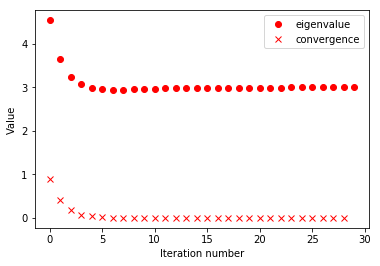

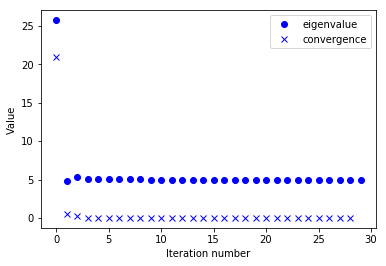

In [33]:
def eig_power(A,v0,Nmax):
    # A is the matrix
    # v0 is the initial eigenvector
    # Nmax is the maximum iteration number
    Lambda = np.zeros(Nmax)
    v = np.zeros((Nmax+1, v0.shape[0]))
    conv = np.zeros(Nmax-1)
    v[0] = np.copy(v0)
    for i in range(Nmax):
        v[i+1] = np.dot(A,v[i])
        Lambda[i] = np.linalg.norm(v[i+1],2)/np.linalg.norm(v[i],2)
    conv = abs(Lambda[1:] - Lambda[:-1])
    v = v/np.linalg.norm(v,2)
    return v, Lambda, conv
# start compute eigenvalues
A21 = np.array([[2., 2., 3.],\
                [0., 2., 0.],\
                [0., 0., 3.]])
x210 = np.array([1., 1., 1.])
A22 = np.array([[15., -10., 10., 5.],\
                [28., -18., 18., 14.],\
                [9., -5., 6., 12.],\
                [-3., 2., -1., 2.]])
x220 = np.array([1., 1., 1., 1.])

v21, Lambda21, conv21 = eig_power(np.copy(A21),np.copy(x210),30)
v22, Lambda22, conv22 = eig_power(np.copy(A22),np.copy(x220),30)

print("ME 581 HW 3 Printout:\n")
np.set_printoptions(precision=6)
print("(a) The final values of the estimated vector is ", v21[30])
print("(a) The final estimated eigenvalue is ", Lambda21[29])
print("(a) The final estimated value of convergence is ", conv21[28])
print("(b) The final values of the estimated vector is ", v22[30])
print("(b) The final estimated eigenvalue is ", Lambda22[29])
print("(b) The final estimated value of convergence is ", conv22[28])

#ww1,vv1 = np.linalg.eig(A21)
#ww2,vv2 = np.linalg.eig(A22)
#print(ww1,vv1)
#print(ww2,vv2)
plt.figure(1)
plt.plot(np.arange(30),Lambda21,'ro', label='eigenvalue')
plt.plot(np.arange(30-1),conv21,'rx', label='convergence')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Value')
plt.figure(2)
plt.plot(np.arange(30),Lambda22,'bo', label='eigenvalue')
plt.plot(np.arange(30-1),conv22,'bx', label='convergence')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Value')
plt.show()

## Problem 3
Each of the following matrices has a unique dominant eigenvalue of multiplicity greater than one, and the eigenvalue does possess a complete set of linearly independent eigenvectors.

For each matrix:

Using each of the initial vectors provided, apply 30 iterations of the power method to determine the dominant eigenvalue and an associated eigenvector. Demonstrate that the eigenvalue sequence converges to the same value but the eigenvector sequence converges to different vectors. Print the final values of the estimated vector, eigenvalue, and convergence $|\lambda^{(n)} - \lambda^{(n-1)}|$. Plot all iterations of the eigenvalue and convergence. Explain the behavior of the eigenvalue and eigenvector sequences.
$$(a) \quad A = \begin{bmatrix}
7 & 0 & 0\\
0 & 7 & 0\\
5 & -1 & 5
\end{bmatrix},\quad x_0 = \begin{bmatrix}
1\\
1\\
1
\end{bmatrix},\quad x_0 = \begin{bmatrix}
-1\\
1\\
-1
\end{bmatrix}$$
$$(b) \quad A = \begin{bmatrix}
5 & -2 & 3 & -1\\
-1 & 6 & -3 & 1\\
-1 & 2 & 1 & 1\\
1 & -2 & 3 & 3
\end{bmatrix},\quad x_0 = \begin{bmatrix}
1\\
1\\
1\\
1
\end{bmatrix},\quad x_0 = \begin{bmatrix}
-1\\
1\\
-1\\
1
\end{bmatrix}$$

$\textbf{Solution:}$ Apply 30 power method iterations, the code is shown below. Starting from different initial vector, the eigenvalue sequence converges to the same value but the eigenvector sequence converges to different vectors. This is because the algebraic multiplicity of the dominant eigenvalue is equal to the geometric multiplicity, the dominant eigenvalue is correspondent to several different eigenvectors. If iterated from a different starting point, the convergent eigenvector may be different.

ME 581 HW 3 Printout:

(a1) The final values of the estimated vector is  [ 0.404067  0.404067  0.808117]
(a1) The final estimated eigenvalue is  7.00003856564
(a1) The final estimated value of convergence is  1.54264921344e-05
(a2) The final values of the estimated vector is  [-0.298426  0.298426 -0.895252]
(a2) The final estimated eigenvalue is  7.00006310832
(a2) The final estimated value of convergence is  2.52442307582e-05
(b1) The final values of the estimated vector is  [  6.846546e-01   6.113898e-05   6.113898e-05   6.846546e-01]
(b1) The final estimated eigenvalue is  4.0001190565
(b1) The final estimated value of convergence is  3.96862834151e-05
(b2) The final values of the estimated vector is  [-0.547735  0.547735  0.41078  -0.41078 ]
(b2) The final estimated eigenvalue is  4.00023340076
(b2) The final estimated value of convergence is  7.78240324877e-05


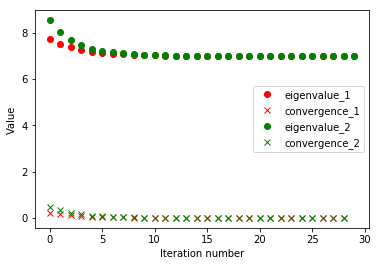

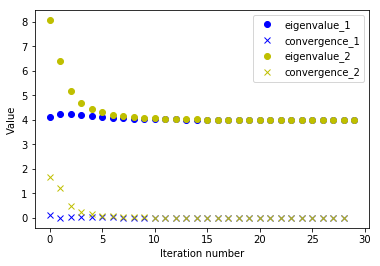

In [34]:
A31 = np.array([[7., 0., 0.],\
                [0., 7., 0.],\
                [5., -1., 5.]])
x3101 = np.array([1., 1., 1.])
x3102 = np.array([-1., 1., -1.])

A32 = np.array([[5., -2., 3., -1.],\
                [-1., 6., -3., 1.],\
                [-1., 2., 1., 1.],\
                [1., -2., 3., 3.]])
x3201 = np.array([1., 1., 1., 1.])
x3202 = np.array([-1., 1., -1., 1.])

v311, Lambda311, conv311 = eig_power(np.copy(A31),np.copy(x3101),30)
v312, Lambda312, conv312 = eig_power(np.copy(A31),np.copy(x3102),30)
v321, Lambda321, conv321 = eig_power(np.copy(A32),np.copy(x3201),30)
v322, Lambda322, conv322 = eig_power(np.copy(A32),np.copy(x3202),30)

print("ME 581 HW 3 Printout:\n")
np.set_printoptions(precision=6)
print("(a1) The final values of the estimated vector is ", v311[30])
print("(a1) The final estimated eigenvalue is ", Lambda311[29])
print("(a1) The final estimated value of convergence is ", conv311[28])
print("(a2) The final values of the estimated vector is ", v312[30])
print("(a2) The final estimated eigenvalue is ", Lambda312[29])
print("(a2) The final estimated value of convergence is ", conv312[28])
print("(b1) The final values of the estimated vector is ", v321[30])
print("(b1) The final estimated eigenvalue is ", Lambda321[29])
print("(b1) The final estimated value of convergence is ", conv321[28])
print("(b2) The final values of the estimated vector is ", v322[30])
print("(b2) The final estimated eigenvalue is ", Lambda322[29])
print("(b2) The final estimated value of convergence is ", conv322[28])

plt.figure(1)
plt.plot(np.arange(30),Lambda311,'ro', label='eigenvalue_1')
plt.plot(np.arange(30-1),conv311,'rx', label='convergence_1')
plt.plot(np.arange(30),Lambda312,'go', label='eigenvalue_2')
plt.plot(np.arange(30-1),conv312,'gx', label='convergence_2')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Value')
plt.figure(2)
plt.plot(np.arange(30),Lambda321,'bo', label='eigenvalue_1')
plt.plot(np.arange(30-1),conv321,'bx', label='convergence_1')
plt.plot(np.arange(30),Lambda322,'yo', label='eigenvalue_2')
plt.plot(np.arange(30-1),conv322,'yx', label='convergence_2')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Value')
plt.show()

## Problem 4
Each of the following matrices has a unique dominant eigenvalue of multiplicity greater than one, but the eigenvalue does not possess a complete set of linearly independent eigenvectors.

For each matrix,

Using each of the initial vectors provided, apply 30 iterations of the power method to determine the dominant eigenvalue and an associated eigenvector. For each initial vector, print the final values of the estimated vector, eigenvalue, and convergence $|\lambda^{(n)} - \lambda^{(n-1)}|$ and plot all iterations of the eigenvalue and convergence. Explain the behavior of the eigenvalue and eigenvector sequences.
$$(a) \quad A = \begin{bmatrix}
0 & 0 & 0 & 1\\
2 & 0 & 0 & 1\\
0 & 2 & 0 & -3\\
0 & 0 & 2 & -5
\end{bmatrix},\quad x_0 = \begin{bmatrix}
1\\
1\\
1\\
1
\end{bmatrix},\quad x_0 = \begin{bmatrix}
-1\\
1\\
-1\\
1
\end{bmatrix}$$
$$(b) \quad A = \begin{bmatrix}
2 & 3 & 4 & 0\\
0 & 2 & 3 & 0\\
0 & 0 & 2 & 0\\
0 & 0 & 0 & 1
\end{bmatrix},\quad x_0 = \begin{bmatrix}
1\\
1\\
1\\
1
\end{bmatrix},\quad x_0 = \begin{bmatrix}
-1\\
1\\
-1\\
1
\end{bmatrix}$$

$\textbf{Solution:}$ The Python code is shown below. The eigenvalue sequence converges to the same value and the eigenvector sequence also converges to the same vector. This is because, the algebraic multiplicity of the dominant eigenvalue is 2 while the geometric multiplicity is 1. The power iteration starting from different initial vector will converge to the same eigenvector since there is only one eigenvector for the dominant eigenvalue.

ME 581 HW 3 Printout:

(a1) The final values of the estimated vector is  [-0.230065 -0.007843  0.698038  0.475816]
(a1) The final estimated eigenvalue is  2.06934951575
(a1) The final estimated value of convergence is  0.00249049906125
(a2) The final values of the estimated vector is  [-0.228578 -0.015305  0.70051   0.488829]
(a2) The final estimated eigenvalue is  2.14104438949
(a2) The final estimated value of convergence is  0.00515014560393
(b1) The final values of the estimated vector is  [  8.829116e-01   3.744082e-02   8.139310e-04   7.580323e-13]
(b1) The final estimated eigenvalue is  2.1352065392
(b1) The final estimated value of convergence is  0.00472549610779
(b2) The final values of the estimated vector is  [ -8.835702e-01  -3.908227e-02  -8.882334e-04   8.272318e-13]
(b2) The final estimated eigenvalue is  2.14140414109
(b2) The final estimated value of convergence is  0.00516976237409


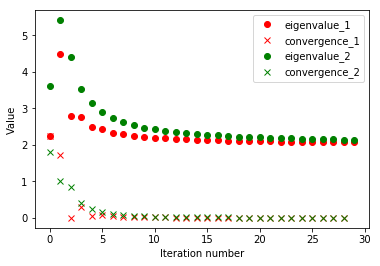

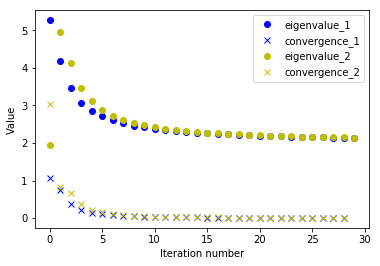

In [35]:
A41 = np.array([[0., 0., 0., 1.],\
                [2., 0., 0., 1.],\
                [0., 2., 0., -3.],\
                [0., 0., 2., -5.]])
x4101 = np.array([1., 1., 1., 1.])
x4102 = np.array([-1., 1., -1., 1.])
A42 = np.array([[2., 3., 4., 0.],\
                [0., 2., 3., 0.],\
                [ 0., 0., 2., 0.],\
                [0., 0., 0., 1.]])
x4201 = np.array([1., 1., 1., 1.])
x4202 = np.array([-1., 1., -1., 1.])

v411, Lambda411, conv411 = eig_power(np.copy(A41),np.copy(x4101),30)
v412, Lambda412, conv412 = eig_power(np.copy(A41),np.copy(x4102),30)
v421, Lambda421, conv421 = eig_power(np.copy(A42),np.copy(x4201),30)
v422, Lambda422, conv422 = eig_power(np.copy(A42),np.copy(x4202),30)

print("ME 581 HW 3 Printout:\n")
np.set_printoptions(precision=6)
print("(a1) The final values of the estimated vector is ", v411[30])
print("(a1) The final estimated eigenvalue is ", Lambda411[29])
print("(a1) The final estimated value of convergence is ", conv411[28])
print("(a2) The final values of the estimated vector is ", v412[30])
print("(a2) The final estimated eigenvalue is ", Lambda412[29])
print("(a2) The final estimated value of convergence is ", conv412[28])
print("(b1) The final values of the estimated vector is ", v421[30])
print("(b1) The final estimated eigenvalue is ", Lambda421[29])
print("(b1) The final estimated value of convergence is ", conv421[28])
print("(b2) The final values of the estimated vector is ", v422[30])
print("(b2) The final estimated eigenvalue is ", Lambda422[29])
print("(b2) The final estimated value of convergence is ", conv422[28])

plt.figure(1)
plt.plot(np.arange(30),Lambda411,'ro', label='eigenvalue_1')
plt.plot(np.arange(30-1),conv411,'rx', label='convergence_1')
plt.plot(np.arange(30),Lambda412,'go', label='eigenvalue_2')
plt.plot(np.arange(30-1),conv412,'gx', label='convergence_2')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Value')
plt.figure(2)
plt.plot(np.arange(30),Lambda421,'bo', label='eigenvalue_1')
plt.plot(np.arange(30-1),conv421,'bx', label='convergence_1')
plt.plot(np.arange(30),Lambda422,'yo', label='eigenvalue_2')
plt.plot(np.arange(30-1),conv422,'yx', label='convergence_2')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Value')
plt.show()